#### This code is my solution of the exercise given at 1:13:19 in the video

In [ ]:
from typing import TypedDict

class AgentState(TypedDict):
    number1:int
    number2:int
    number3:int
    number4:int
    operation1:str
    operation2:str
    finalNumber1:int
    finalNumber2:int

# NOTE: It's a good habit for all of the below functions to have a docstring, I am omitting it here for brevity
def execute_add_1(state:AgentState)->AgentState:
    state['finalNumber1'] = state['number1'] + state['number2']
    return state

def execute_subtract_1(state:AgentState)->AgentState:
    state['finalNumber1'] = state['number1'] - state['number2']
    return state

def execute_add_2(state:AgentState)->AgentState:
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def execute_subtract_2(state:AgentState)->AgentState:
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

def get_next_edge_1(state:AgentState)->str:
    if(state['operation1'] == '+'):
        return "add"
    else:
        return "sub"

def get_next_edge_2(state:AgentState)->str:
    if(state['operation2'] == '+'):
        return "add"
    else:
        return "sub"

In [37]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(AgentState)

builder.add_node("router1", lambda state:state) # pass through function
builder.add_node("router2", lambda state:state) # pass through function
builder.add_node("add1", execute_add_1)
builder.add_node("subtract1", execute_subtract_1)
builder.add_node("add2", execute_add_2)
builder.add_node("subtract2", execute_subtract_2)

builder.add_edge(START, "router1")
builder.add_conditional_edges(
    "router1", 
    get_next_edge_1,
    {
        "add": "add1",
        "sub": "subtract1"
    }                         
)
builder.add_edge("add1", "router2")
builder.add_edge("subtract1", "router2")
builder.add_conditional_edges(
    "router2",
    get_next_edge_2,
    {
        "add": "add2",
        "sub": "subtract2"
    }                         
)
builder.add_edge("add2", END)
builder.add_edge("subtract2", END)

graph = builder.compile()

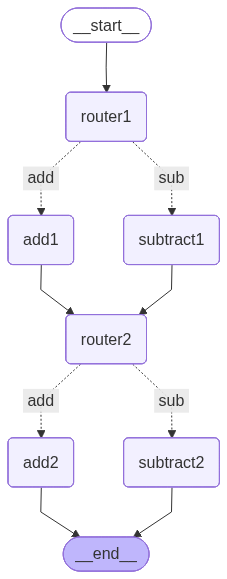

In [38]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png())) # visualize the graph

In [40]:
# final_state:AgentState = graph.invoke({'number1': 10, 'number2':5, 'number3':7, 'number4':3, "operation1":'-', 'operation2':'+'}) #This is also fine! 
final_state:AgentState = graph.invoke(AgentState(number1= 10, number2=5, number3=7, number4=3, operation1='+', operation2='-')) # Here, we are being explicit. This is better!
print("finalNumber1 is : ", final_state['finalNumber1'])
print("finalNumber2 is : ", final_state['finalNumber2'])

finalNumber1 is :  15
finalNumber2 is :  4
